# Домашня робота № 10

## Згорткові нейроні мережі

### Завдання Частина 1

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету [fasion_mnist. ](https://www.tensorflow.org/datasets/catalog/fashion_mnist) 



На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.



## Інформація про обєкт дослідження dataset fashion-mnist

Fashion-MNIST — це набір зображень статей Zalando, що складається з навчального набору з 60 000 прикладів і тестового набору з 10 000 прикладів. Кожен приклад являє собою зображення в градаціях сірого 28x28, пов'язане з міткою з 10 класів:

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output, display, Math

In [47]:
from keras.datasets import fashion_mnist # Імортуємо обєкт дослідження 

Список констант(ознак для дослідження) з нашого Датасету

In [48]:
class_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}
input_shape = (28, 28, 1)

Готуємо навчальний  та тестовий набор для дослідження

In [49]:
# Завантажуємо датасет і розділимо його на навчальну та тестову вибірки.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

# Нормалізуємо значення пікселів, щоб значення пікселів знаходилось у проміжку від 0 до 1, розділивши яскравість кожного пікселя на 255.
x_train, x_test = x_train / 255.0, x_test / 255.0

In [50]:
# Побудова архітектури моделі
keras.utils.set_random_seed(42)


def build_model(dropout_rate):
    model = keras.Sequential()

    model.add(
        layers.Conv2D(
            32, (3, 3), padding="same", activation="relu", input_shape=(28, 28, 1)
        )
    )
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation="relu"))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(10, activation="softmax"))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-4, ema_momentum=0.9),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model

### Гіперпараметри

In [51]:
dropout_rate = 0.25
batch_size = 64
epochs = 20

## Створення моделі

In [52]:
model = build_model(dropout_rate)
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 804,682 (3.07 MB)

 Trainable params: 804,618 (3.07 MB)

 Non-trainable params: 64 (256.00 B)

## Навчання створеної моделі

Використаэмо колбек ранньої зупинки EarlyStopping:   

early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=7, mode='max', min_delta=0.01, baseline=0.91)
Для ранньої зупинки будемо моніторити monitor='val_accuracy' точність (accuracy) на валідаційній вибірці.   
Параметр patience=5, означає, що якщо точність на валідаційній вибірці не збільшиться протягом 5 останніх епох, навчання буде зупинено.   
Параметр mode='max' означає, що ми хочемо досягти максимального значення метрики (точності) перед зупинкою навчання.   
Параметр min_delta=0.01 означає, що метрика має збільшитися хоча б на 0.01, щоб вважатися поліпшенням.   
Параметр baseline=0.91 означає, що ми чекаємо, коли точність на валідаційній вибірці досягне або перевищить 0.91, щоб зупинити навчання.    

In [105]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.00001,
    patience=5,
    mode="max",
    baseline=0.91,
    restore_best_weights=False,
)


# Перемішаємо тренувальні дані
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(256).prefetch(1)


# Навчання моделі
history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    callbacks=[early_stopping],
    batch_size=batch_size,
    validation_data=(x_test, y_test),
)

# Оцінка моделі на тестовому наборі даних
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"\nТочність на тестовому наборі: {test_accuracy:.4f}")

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 90ms/step - accuracy: 0.9962 - loss: 0.0117 - val_accuracy: 0.9209 - val_loss: 0.5176
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 93ms/step - accuracy: 0.9958 - loss: 0.0125 - val_accuracy: 0.9195 - val_loss: 0.5327
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 92ms/step - accuracy: 0.9959 - loss: 0.0115 - val_accuracy: 0.9152 - val_loss: 0.5427
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.9960 - loss: 0.0120 - val_accuracy: 0.9175 - val_loss: 0.5346
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.9964 - loss: 0.0106 - val_accuracy: 0.9151 - val_loss: 0.5574
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 80ms/step - accuracy: 0.9958 - loss: 0.0114 - val_accuracy: 0.9202 - val_loss: 0.5654
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9209 - loss: 0.5924

Точність на тестовому наборі: 0.9202


## Графіки кривих навчання 

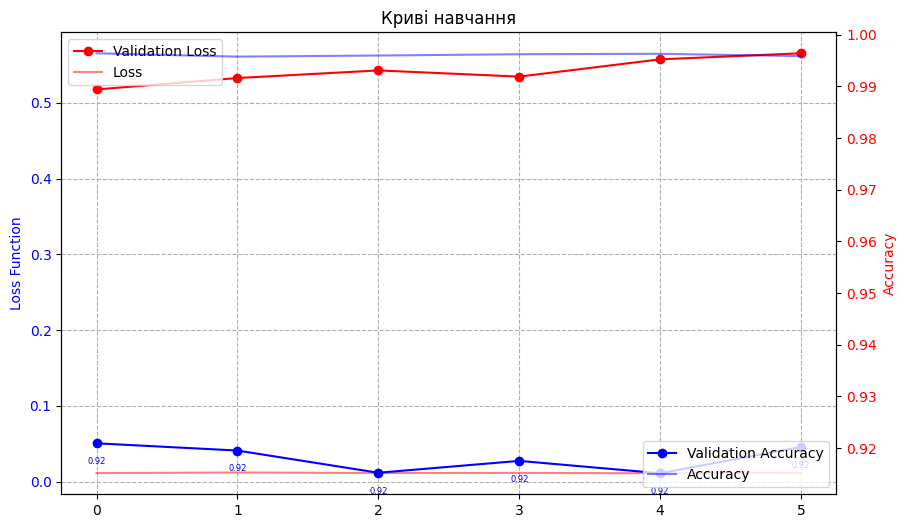

In [106]:

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(history.history["val_loss"], label="Validation Loss", marker="o", color="r")
ax1.plot(history.history["loss"], label="Loss", color="r", alpha=0.5)
ax1.set_ylabel("Loss Function", color="b")
ax1.tick_params(axis="y", labelcolor="b")

ax2 = ax1.twinx()

ax2.plot(
    history.history["val_accuracy"], label="Validation Accuracy", marker="o", color="b"
)
ax2.plot(history.history["accuracy"], label="Accuracy", color="b", alpha=0.5)

for i, acc in enumerate(history.history["val_accuracy"]):
    ax2.annotate(
        f"{acc:.2f}",
        (i, acc),
        textcoords="offset points",
        xytext=(0, -15),
        ha="center",
        c="b",
        fontsize=6,
    )
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy", color="r")
ax2.tick_params(axis="y", labelcolor="r")
ax1.grid(True, linestyle="--")

ax1.legend(loc="upper left")
ax2.legend(loc="lower right")

plt.title("Криві навчання")

plt.show()


Аналізуючи графіки видно перенавчання нашої моделі.

### Перевіряємо розраховані параметри.

In [107]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


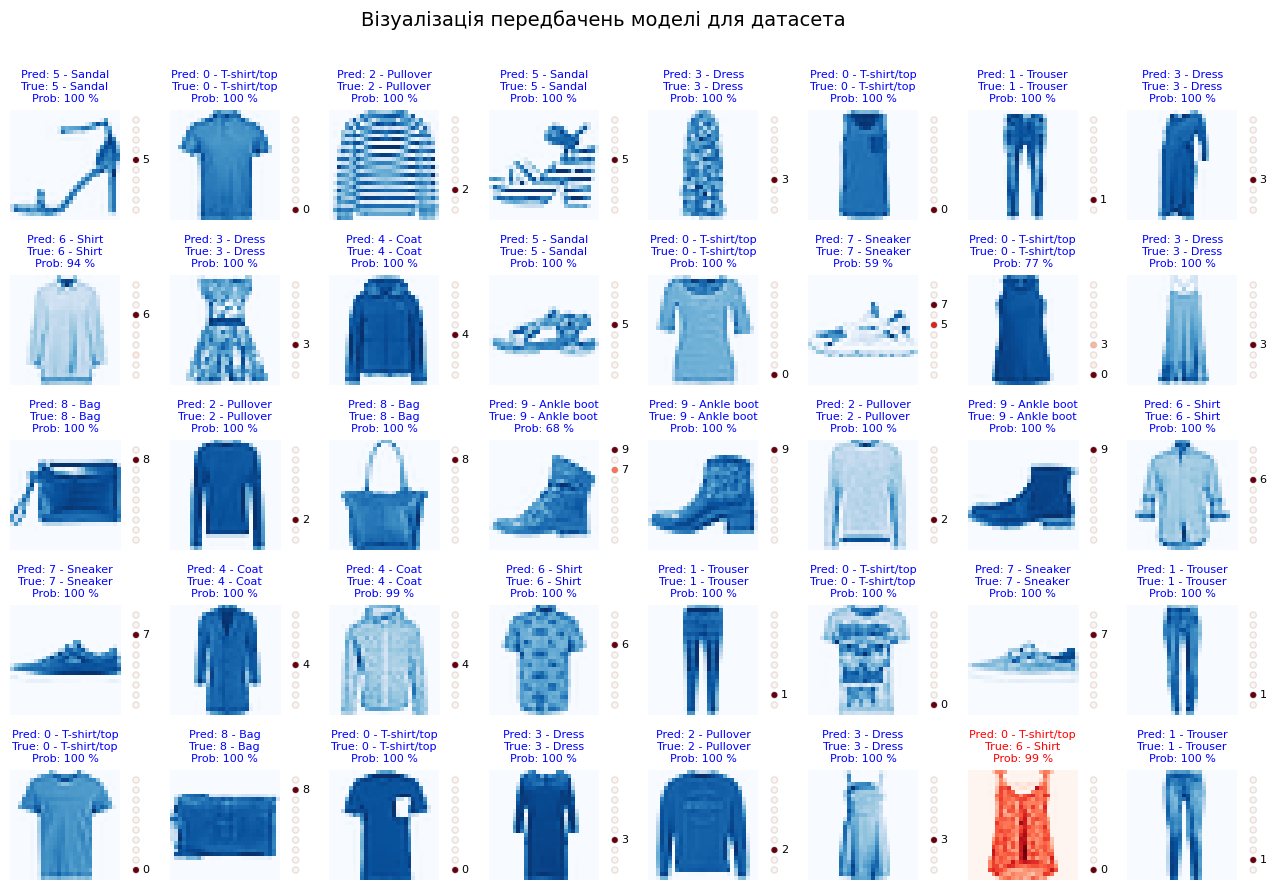

In [112]:
number_of_images = 40
f, ax = plt.subplots(5, 8, figsize=(16, 10))
f.subplots_adjust(hspace=0.5, wspace=0.3)

f.suptitle("Візуалізація передбачень моделі для датасета", fontsize=14)


for axes_index, sample_index in enumerate(np.random.choice(10000, number_of_images)):
    prob = predictions[sample_index]
    img, true_label = x_test[sample_index], y_test[sample_index]
    predicted_label = np.argmax(prob)
    if predicted_label == true_label:
        color = "blue"
        cmap = "Blues"
    else:
        color = "red"
        cmap = "Reds"

    ax[axes_index // 8, axes_index % 8].imshow(img, cmap=cmap)
    ax[axes_index // 8, axes_index % 8].axis("off")
    ax[axes_index // 8, axes_index % 8].set_title(
        f"Pred: {predicted_label} - {class_labels.get(predicted_label)}\nTrue: {true_label} - {class_labels.get(true_label)}\nProb: {prob.max()*100:.0f} %",
        fontsize=8,
        color=color,
    )

    inset_ax = f.add_axes(
        [
            ax[axes_index // 8, axes_index % 8].get_position().x1,
            ax[axes_index // 8, axes_index % 8].get_position().y0,
            0.02,
            ax[axes_index // 8, axes_index % 8].get_position().height,
        ]
    )

    classes = np.arange(len(class_labels))
    inset_ax.scatter(
        np.ones(10) * 0.5,
        classes,
        s=20,
        c=prob,
        cmap="Reds",
        marker="o",
        edgecolor=(0.5, 0.5, 0.5, 0.2),
        linewidths=1,
    )
    inset_ax.set_xlim(0, 1)
    inset_ax.set_ylim(-1, 10)
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])
    inset_ax.axis("off")
    for i, p in enumerate(prob):
        if p > 0.1:
            inset_ax.text(0.7, i, f"{i}", fontsize=8, verticalalignment="center")

plt.show()

В наведеному прикладі візуально можемо спостергати : синім коліром - розпізнані правильно, в червоним - неправильно. Праворуч наведена шкала (фактично це нейрони вихідного шару), де колір пропорційний "ймовірності" розпізнавання, також праворуч наведені мітки класів (номер нейрона), якщо їх ймовірність більше 10 %, щоб можна побачити принаймні, де наша модель мала "сумніви", і врешті решт якому класу вона давала перевагу. Можливо, це в подальших дослідженнях натякне на спосіб покращення точності.

# Висновок

В результаті використання згорткової нейронної мережі вдалось досягти точності 0.9202. В попередньому завдання для повнозвязної нейронної мережі вдалось досягти точності лише 0.89.  

На випадково вибраних 40 зображеннях вдається часто побачити такі вибірки, де не правильно розпізнано всього одне зображення, або навіть можна знайти де всі зображення віроно розпізнані. як намлюку Test_5.png.

Отже, згорткові нейронні мережі є більш ефективними для обробки зображень.  